# Trajectory Divergence
Work in progress

In [2]:
from IPython.display import display
import math
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('trajectories.pkl', 'rb') as f:
    data = pkl.load(f)

In [4]:
traj_df = data['traj_df'] # pandas dataframe with 3D coordinates, time, particpant id (pid), clip id (clip) and  clip name as columns
clip_len = data['clip_len'] # array consisting number of time points indexed by clip_id

In [5]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
pd.reset_option('all')
traj_df


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,x,y,z,time,pid,clip,clip_name
0,-0.068375,0.292656,0.076036,0,1,0,testretest
1,-0.560828,0.290854,0.095379,1,1,0,testretest
2,0.248541,-0.024260,-0.019393,2,1,0,testretest
3,-0.021169,0.253559,1.618106,3,1,0,testretest
4,-0.218407,0.420255,2.193483,4,1,0,testretest
...,...,...,...,...,...,...,...
245399,-6.074567,-14.429848,13.255661,251,76,14,starwars
245400,-5.333982,-15.487228,15.741982,252,76,14,starwars
245401,-5.229411,-14.917367,16.472929,253,76,14,starwars
245402,-4.298551,-12.905822,15.564515,254,76,14,starwars


In [6]:
print(traj_df.clip_name.unique())

['testretest' 'twomen' 'bridgeville' 'pockets' 'overcome' 'inception'
 'socialnet' 'oceans' 'flower' 'hotel' 'garden' 'dreary' 'homealone'
 'brokovich' 'starwars']


In [7]:
def divergence(traj):
    length = traj.shape[0]
    increment = length // 10
    
    total_div = 0
    for start in range(increment):
        div = 0
        prev = start
        for i in range(start+increment, length, increment):
            div += math.sqrt((traj[i,0]-traj[prev,0])**2 + (traj[i,1]-traj[prev,1])**2 + (traj[i,2]-traj[prev,2])**2)
            prev = i
        total_div += div
        
    return(total_div / increment)

<IPython.core.display.Javascript object>


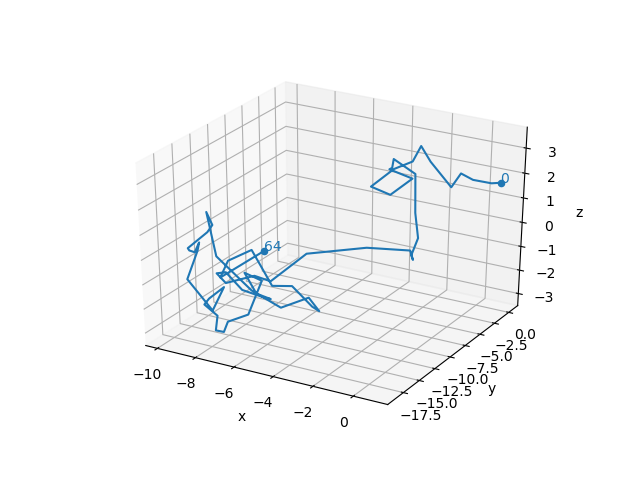

Divergence: 44.796


In [8]:
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
%matplotlib notebook

def single_trajectory(traj_df, clip_name, pid):
    if (isinstance(clip_name, int)):
        clip_name = traj_df.clip_name.unique()[clip_name]
    
    filter_clip_name = [clip_name]
    filter_pid = [pid]
    temp_df = traj_df[traj_df.clip_name.isin(filter_clip_name) & traj_df.pid.isin(filter_pid)]
    #display(temp_df)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    length = clip_len[np.where(traj_df.clip_name.unique()==clip_name)[0][0]]
    single_traj = np.array(temp_df[['x','y','z']])
            
    ax.plot3D(single_traj[:,0], single_traj[:,1], single_traj[:,2], c='C0')
    ax.scatter(single_traj[0,0], single_traj[0,1], single_traj[0,2], c='C0')
    ax.text(single_traj[0,0], single_traj[0,1], single_traj[0,2], 0, c='C0')
    ax.scatter(single_traj[-1,0], single_traj[-1,1], single_traj[-1,2], c='C0')
    ax.text(single_traj[-1,0], single_traj[-1,1], single_traj[-1,2], length-1, c='C0')

    plt.show()
    
    return single_traj

single_traj = single_trajectory(traj_df, 'overcome', 1)
#single_traj = single_trajectory(traj_df, 4, 1)
div = divergence(single_traj)
print(f'Divergence: {div:.3f}')

<IPython.core.display.Javascript object>


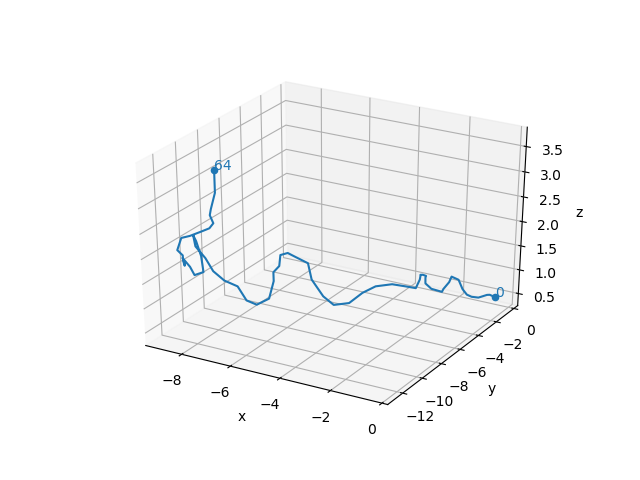

Divergence: 18.062


In [11]:
def mean_trajectory(traj_df, clip_name):
    if (isinstance(clip_name, int)):
        clip_name = traj_df.clip_name.unique()[clip_name]
    
    filter_clip_name = [clip_name]
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    length = clip_len[np.where(traj_df.clip_name.unique()==clip_name)[0][0]]
    mean_traj = np.zeros((length,3))
    for time in range(length):
        filter_time = [time]
        temp_df = traj_df[traj_df.clip_name.isin(filter_clip_name) & traj_df.time.isin(filter_time)]
        mean_traj[time,0] = np.mean(temp_df['x'])
        mean_traj[time,1] = np.mean(temp_df['y'])
        mean_traj[time,2] = np.mean(temp_df['z'])
            
    ax.plot3D(mean_traj[:,0], mean_traj[:,1], mean_traj[:,2], c='C0')
    ax.scatter(mean_traj[0,0], mean_traj[0,1], mean_traj[0,2], c='C0')
    ax.text(mean_traj[0,0], mean_traj[0,1], mean_traj[0,2], 0, c='C0')
    ax.scatter(mean_traj[-1,0], mean_traj[-1,1], mean_traj[-1,2], c='C0')
    ax.text(mean_traj[-1,0], mean_traj[-1,1], mean_traj[-1,2], length-1, c='C0')
    
    plt.show()
    
    return mean_traj

mean_traj = mean_trajectory(traj_df, 'overcome')
#mean_traj = mean_trajectory(traj_df, 4)
div = divergence(mean_traj)
print(f'Divergence: {div:.3f}')

In [15]:
print(clip_len)

[84, 245, 222, 189, 65, 227, 260, 250, 181, 186, 205, 143, 233, 231, 256]
